# <center>Company Profit Prediction</center>

### Modules

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.shape

(50, 5)

In [6]:
le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [7]:
X = df.drop(columns=['Profit'])
y = df['Profit']

In [11]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [17]:
lm = LinearRegression()

kfold = KFold(n_splits=4)
score = cross_val_score(lm, X, y, cv=kfold, scoring='neg_root_mean_squared_error')

print("Cross validation score is", score)

Cross validation score is [ -9418.18983049  -9806.72408463  -6551.24951944 -14632.38196009]


In [18]:
lm.fit(X_train, y_train)

LinearRegression()

In [19]:
lm.coef_

array([  0.80379465,  -0.06791023,   0.03126059, -16.82030683])

In [20]:
lm.intercept_

54080.71684611383

In [21]:
y_pred = lm.predict(X_test)

In [22]:
r2_score(y_test, y_pred)

0.9000614254946406

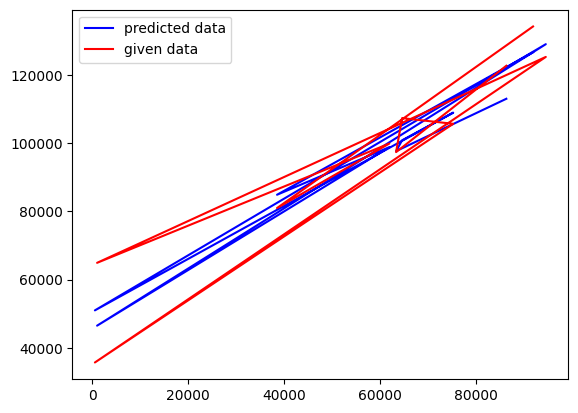

In [23]:
# plt.plot(X_test['R&D Spend'], y_pred, 'b', label='predicted data')
# plt.plot(X_test['R&D Spend'], y_test, 'r', label='given data')

plt.legend()
plt.show()

The predicted values and given values closely coincide with each other.